In [4418]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4419]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()    

In [4420]:
def checkCorrFF(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [4421]:
def checkCorrFT(df, target):
    sns.pairplot(df, hue = target)

In [4422]:
def checkYesNo(df, col:str, colTarget:str):
    checkdf = df.loc[df[col] == colTarget]
    return checkdf['y'].value_counts()

# 6 13 16

In [4423]:
df = pd.read_csv('HWdata/bank/bank-full.csv')
df_test = pd.read_csv('HWdata/bank/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


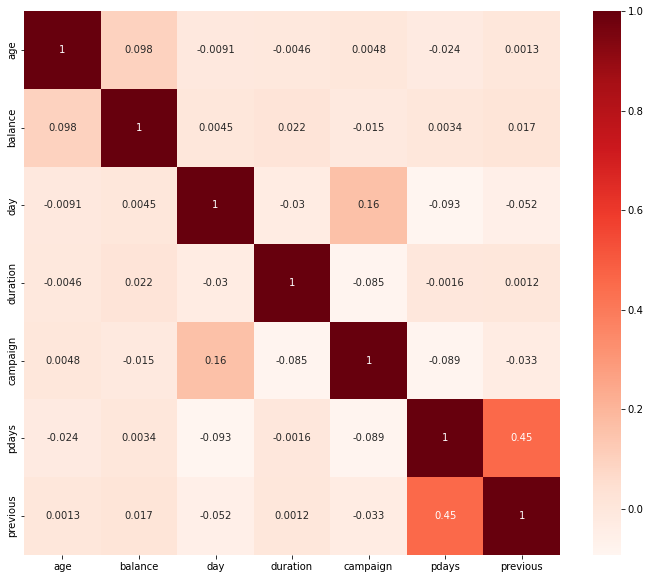

In [4424]:
checkCorrFF(df)

In [4425]:
# Drop features w/ high correlation
df.drop(columns=['pdays','day','month'], inplace=True)
df_test.drop(columns=['pdays','day','month'], inplace=True)

### Check 'education' feature and manage unknown data

In [4426]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [4427]:
# Replace unknown education with most common
df['education'] = df['education'].replace({'unknown':'secondary'})
# df_test['education'] = df_test['education'].replace({'unknown':'secondary'})
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

### Check 'job' feature and manage unknown data

In [4428]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [4429]:
# Remove unknown data since it is a small portion of the data
# df.drop(df[df['job'] == 'unknown'].index, inplace=True)
# Replace unknown contact with most common
df['job'] = df['job'].replace({'unknown':'blue-collar'})
# df_test['job'] = df_test['job'].replace({'unknown':'blue-collar'})
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

### Check 'contact' feature and manage unknown data

In [4430]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [4431]:
# Replace unknown contact with most common
df['contact'] = df['contact'].replace({'unknown':'cellular'})
# df_test['contact'] = df_test['contact'].replace({'unknown':'cellular'})
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

### Check 'poutcome' feature and manage unknown data

In [4432]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [4433]:
# Drop poutcome since it is mostly unknown
df.drop(columns=['poutcome'], inplace=True)
# df_test.drop(columns=['poutcome'], inplace=True)

### Feature scale

In [4434]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df['campaign']=min_max_scaler.fit_transform(df['campaign'].values.reshape(-1,1))
df['balance']=min_max_scaler.fit_transform(df['balance'].values.reshape(-1,1))
df['age']=min_max_scaler.fit_transform(df['age'].values.reshape(-1,1))
df['duration']=min_max_scaler.fit_transform(df['duration'].values.reshape(-1,1))
df['previous']=min_max_scaler.fit_transform(df['previous'].values.reshape(-1,1))

In [4435]:
df_test['campaign']=min_max_scaler.fit_transform(df_test['campaign'].values.reshape(-1,1))
df_test['balance']=min_max_scaler.fit_transform(df_test['balance'].values.reshape(-1,1))
df_test['age']=min_max_scaler.fit_transform(df_test['age'].values.reshape(-1,1))
df_test['duration']=min_max_scaler.fit_transform(df_test['duration'].values.reshape(-1,1))
df_test['previous']=min_max_scaler.fit_transform(df_test['previous'].values.reshape(-1,1))

In [4436]:
df['campaign'].describe()

count    45211.000000
mean         0.028449
std          0.049968
min          0.000000
25%          0.000000
50%          0.016129
75%          0.032258
max          1.000000
Name: campaign, dtype: float64

In [4437]:
df['balance'].describe()

count    45211.000000
mean         0.085171
std          0.027643
min          0.000000
25%          0.073457
50%          0.076871
75%          0.085768
max          1.000000
Name: balance, dtype: float64

### Transform Categorical Data using One-hot Encoding

In [4438]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
x = pd.get_dummies(x)
df_test = pd.get_dummies(x_test)

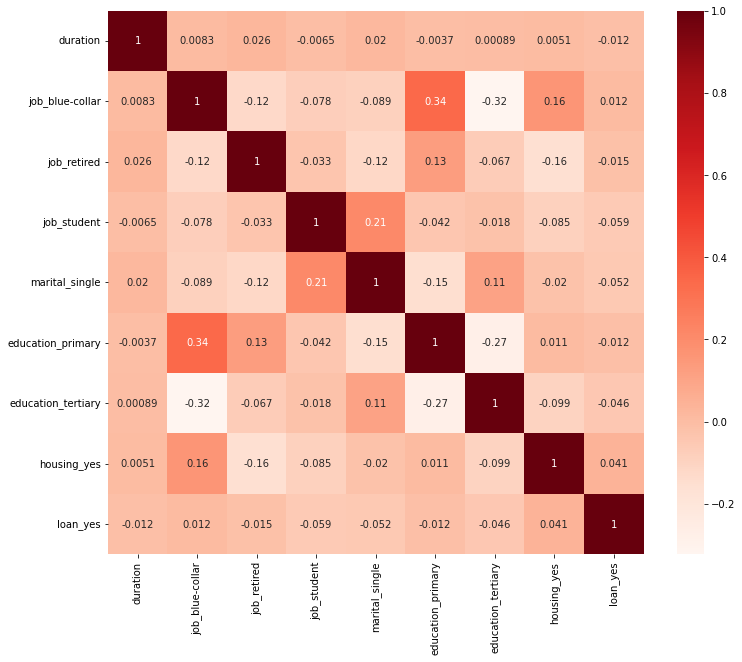

In [4439]:
selector = SelectKBest(chi2, k=12)
df_new = selector.fit(x, y)

col = selector.get_support(indices=True)
df_new = x.iloc[:,col]

df_new = df_new.drop(columns=['housing_no','marital_married','job_management'])

checkCorrFF(df_new)

In [4440]:
df = pd.concat([df_new, y], axis=1)
# df_new
# checkCorrFT(df_new.iloc[:,lambda x: [0,1,2,-1]], 'y')
df.columns

Index(['duration', 'job_blue-collar', 'job_retired', 'job_student',
       'marital_single', 'education_primary', 'education_tertiary',
       'housing_yes', 'loan_yes', 'y'],
      dtype='object')

In [4441]:
df_test = pd.concat([df_test, y_test], axis=1)
df_test.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y'],
      dtype='object')

In [4442]:
list(df.columns)

['duration',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'marital_single',
 'education_primary',
 'education_tertiary',
 'housing_yes',
 'loan_yes',
 'y']

In [4443]:
df_test = df_test.drop(columns=[i for i in list(df_test.columns) if i not in list(df.columns)])

In [4444]:
# # Drop No outlier
# df = df.drop(df[df['campaign'] >= 40].index)
# df['campaign'].value_counts()

# # Drop Yes outlier
# cp20up = df[df['campaign'] > 18]
# df = df.drop(cp20up[cp20up['y'] == 'yes'].index)

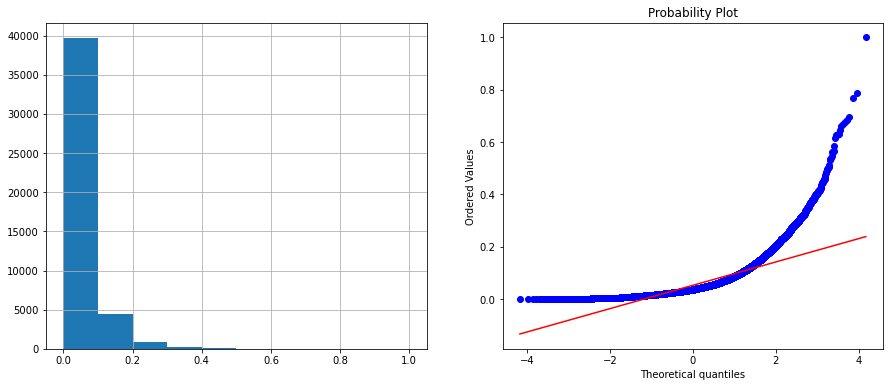

In [4445]:
df['duration'].describe()
diagnostic_plots(df,'duration')

In [4446]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1   # Interquartile range
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
outlier = df[(df['duration'] > upper_lim) | (df['duration'] < lower_lim)]
len(df['duration']) - len(outlier)

41976

In [4447]:
# df = df.drop(outlier.index)
# df = df.drop(df[df['campaign'] > upper_lim].index)
# df = df.drop(df[df['campaign'] < lower_lim].index)
# df['campaign'] = df['campaign'][~(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)].astype(int)
# df['y'].value_counts()

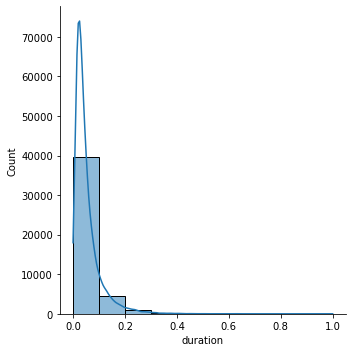

In [4448]:
sns.displot(df['duration'], bins=10 , kde=True)
# df['campaign']=np.log(df['campaign'])

In [4449]:
# df['campaign'].value_counts()

<AxesSubplot:xlabel='duration', ylabel='y'>

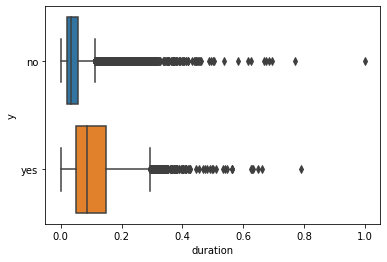

In [4450]:
sns.boxplot(x='duration', y='y', data=df)

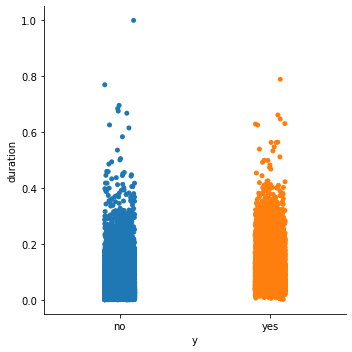

In [4451]:
sns.catplot(x= 'y',y='duration', data=df) # plot relationship between data

In [4452]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1] 
y = df.iloc[:,-1]
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf = LogisticRegression()
clf.fit(x,y)
print("model score: %.8f" % clf.score(x_test, y_test))

model score: 0.87679717


/home/azthorax/anaconda3/envs/fra501_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


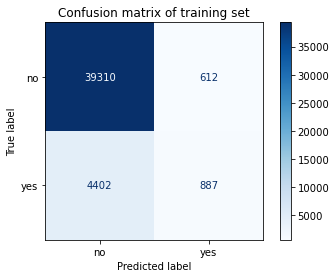

In [4453]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x,
                      y,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [4454]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(x)
print("Classification report \n=======================")
print(classification_report(y_true=y, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

          no       0.90      0.98      0.94     39922
         yes       0.59      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211

Confusion matrix 
[[39310   612]
 [ 4402   887]]
